### in polynomial linear regression we have degree and we need to set the value of the degree 
* if we have 1 col x and degree = 2 then our y = b0 + b1x + b2 x^2

* if degree = 3 then y = b0 + b1x + b2 x^2 + b3 x^3..

* if degree = 2, and we have 2 column, x1 and x2 then
* y = b0 + b1x1 + b2 x1 ^2 + b3x2 + b4 x2^2..

### the reason why we call it a linear regreesion even its a polynomial is that the cofecient is still of degree 1 its linear so we call it a polynomial linear regression

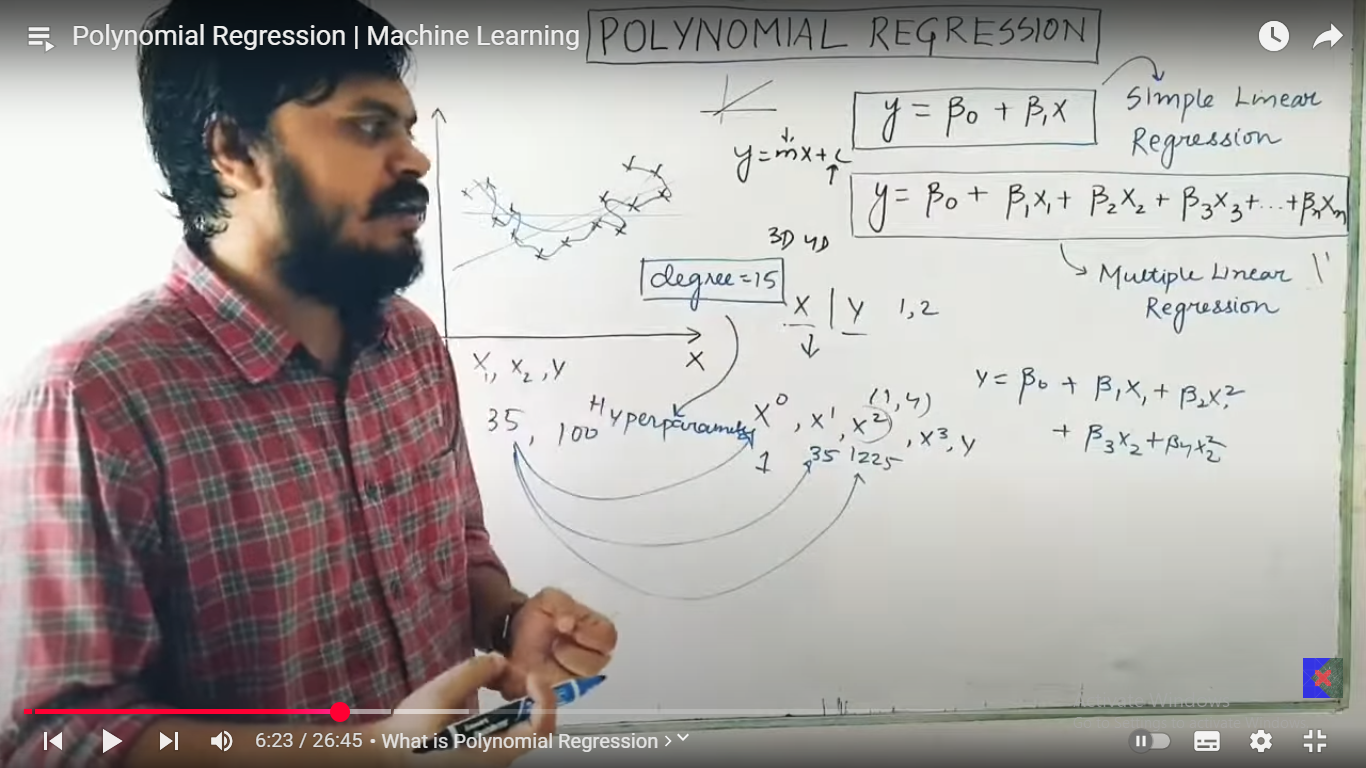

In [94]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [95]:
# createing our own dataset

x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
# so we need to find the coeficient of x^2 and x 

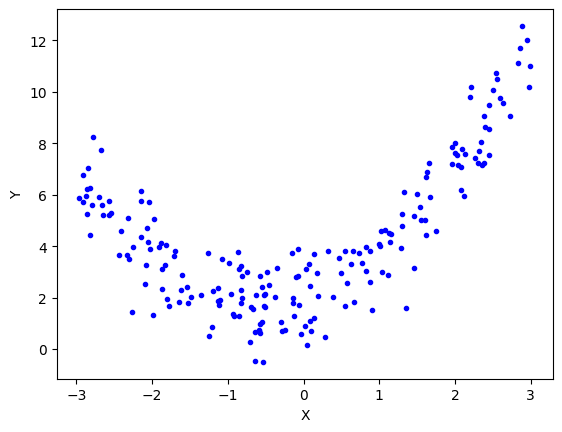

In [96]:
plt.plot(x, y, 'b. ')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [98]:
lr = LinearRegression()

In [99]:
lr.fit(x_train, y_train)

LinearRegression()

In [100]:
y_pred = lr.predict(x_test)

In [101]:
r2_score( y_test, y_pred) #here 1st give actuall/test data , 2nd predicted data

-0.263191010148107

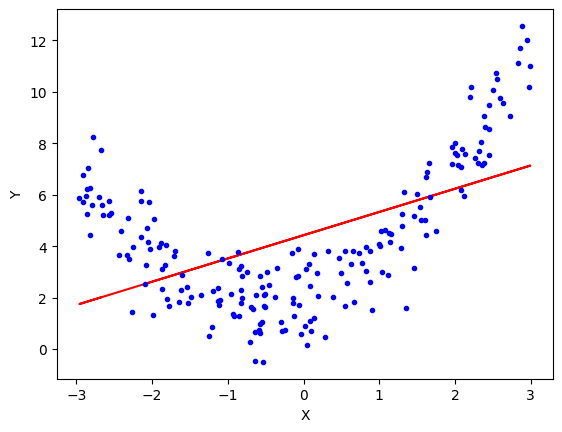

In [102]:
plt.plot(x_train, lr.predict(x_train), color='r')
plt.plot(x,y, 'b. ')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### now applying polynomial linear regression
### degree = 2

In [103]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [104]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)


In [105]:
print(x_train[0])
print(x_train_trans[0]) #x^0 , x^1, x^2  , if include_bias = true then x^0 is not come 


[-2.04800562]
[ 1.         -2.04800562  4.19432703]


In [106]:
#include_bias parameter

In [107]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

LinearRegression()

In [108]:
y_pred = lr.predict(x_test_trans)

In [109]:
r2_score(y_test, y_pred)

0.7451058769933063

In [110]:
print(lr.coef_) # you can match it x^0 = 0, x^1 = 0.9, x^2 = 0.8

[[0.        0.8797081 0.7934937]]


In [111]:
print(lr.intercept_)

[2.07342021]


In [112]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new = lr.predict(x_new_poly)

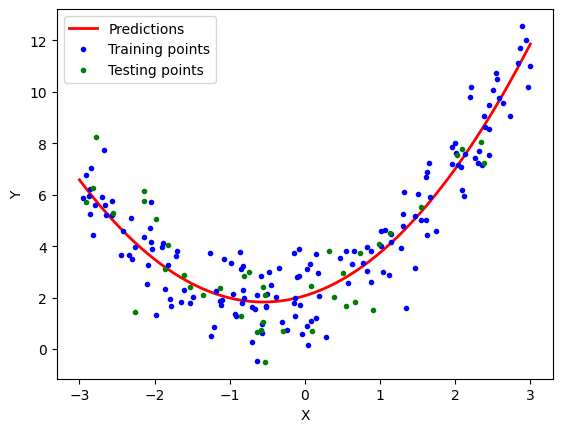

In [113]:
plt.plot(x_new, y_new, "r-", linewidth=2, label='Predictions')
plt.plot(x_train, y_train, "b. ", label='Training points')
plt.plot(x_test, y_test, "g. ", label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [114]:
def polynomial_regression(degree):
    x_new=np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_poly = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

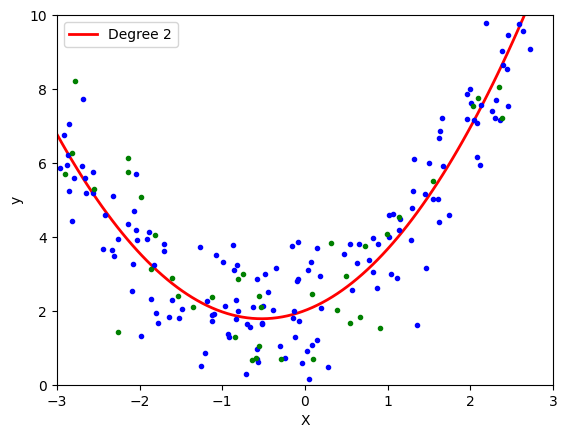

In [115]:
polynomial_regression(2)

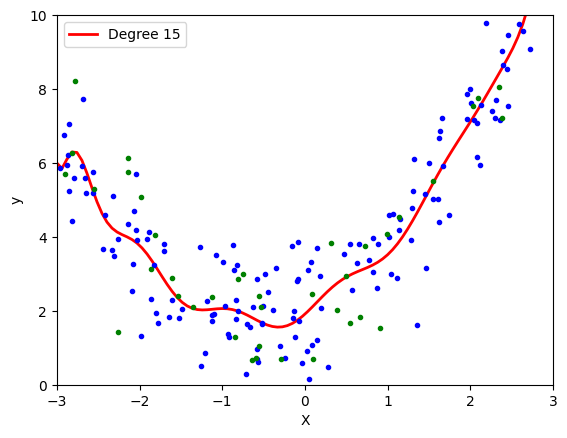

In [116]:
polynomial_regression(15)

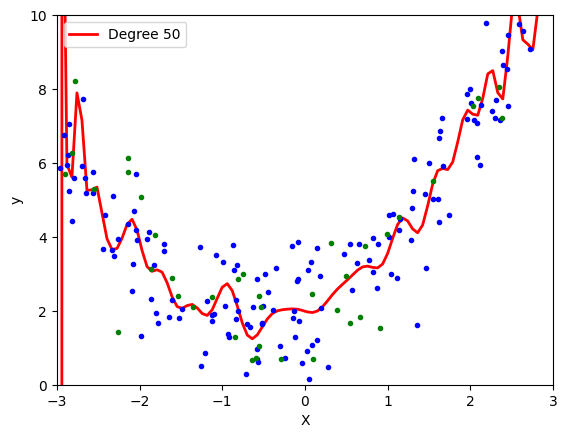

In [117]:
polynomial_regression(50)

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1156: RuntimeWarning:

overflow encountered in square

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning:

overflow encountered in reduce



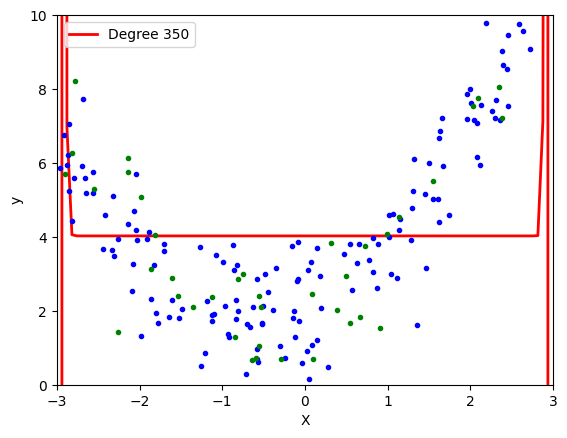

In [118]:
polynomial_regression(350)

In [119]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\hp.1\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



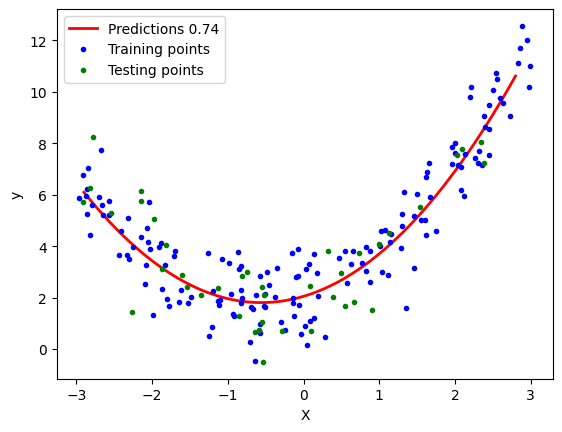

In [120]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(x_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [121]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [122]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [123]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [124]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [125]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=2) #if you change the degree to more then the 3d graph below will have more spiks try it:)
X_multi_trans = poly.fit_transform(X_multi)

In [127]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [135]:
X_multi_trans.shape

(100, 6)

In [136]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [137]:
X_test_multi = poly.transform(final)

In [138]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [139]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()